In [1]:
import numpy as np
import pandas as pd 
 


In [2]:
result=pd.read_csv("/content/preprocessed_ade.csv") 

In [3]:
result

,Unnamed: 0,observation,labels
0,12606,early phase ii semi double blind study of the ...,0
1,685,cessation of mtx therapy led to complete regre...,0
2,5127,cutaneous biopsy showed hyphae and round inclu...,0
3,3158,she was treated with acyclovir and subsequentl...,1
4,10685,cisplatin was substituted and the patient achi...,0
...,...,...,...
23511,982,ticlopidine induced aplastic anemia two new c...,1
23512,14487,the risks of sumatriptan administration in pat...,0
23513,4680,however the spectrum of hosts and clinical p...,0
23514,2588,antibiotic treatment should be continued,0


In [4]:
validation_data = result.sample(frac = 0.2)
result=result.drop(validation_data.index) 

In [5]:
validation_data

,Unnamed: 0,observation,labels
3325,13279,the discontinuation of heavy caffeine intake a...,0
2706,232,repeat neuropsychological testing weeks afte...,0
21235,8202,the isotretinoin a cis retinoic acid ha...,0
13048,13408,it cannot be assumed that the development of a...,0
4129,6265,this case report stresses the need for control...,0
...,...,...,...
7296,1261,we report in detail an unusual adverse reactio...,1
19779,4466,myoclonic spasms following intrathecal morphine,1
13154,8760,eleven consecutive jw adult patients with acut...,0
14410,3540,thalidomide as elective treatment in persisten...,0


In [6]:
result 

,Unnamed: 0,observation,labels
0,12606,early phase ii semi double blind study of the ...,0
3,3158,she was treated with acyclovir and subsequentl...,1
5,15871,severe hypomagnesemia occurred in this patient...,0
6,7601,so he underwent surgical treatment,0
7,1374,one case presented with stevens johnson syndro...,0
...,...,...,...
23511,982,ticlopidine induced aplastic anemia two new c...,1
23512,14487,the risks of sumatriptan administration in pat...,0
23513,4680,however the spectrum of hosts and clinical p...,0
23514,2588,antibiotic treatment should be continued,0


In [7]:
#count vectorizing 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer 

In [9]:
cv = CountVectorizer(max_features=500)
x= cv.fit_transform(result['observation']).toarray() 

In [10]:
y=result['labels']

In [11]:
result['labels'].value_counts() 

0    13335
1     5478
Name: labels, dtype: int64

In [12]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


**SMOTE**

In [13]:
from imblearn.over_sampling import SMOTE 

In [14]:
smote = SMOTE(random_state = 2021)
x, y = smote.fit_resample(x,y)

In [15]:
x.shape

(26670, 500)

In [16]:
y.shape 

(26670,)

In [17]:
zerocount=0
onecount=0
for i in y:
  if i == 0:
    zerocount+=1
  else:
    onecount+=1
print("no of negative sample in training class is:",zerocount)
print("no of positive sample in training class is:",onecount)

no of negative sample in training class is: 13335
no of positive sample in training class is: 13335


**Creating validation data** 

In [18]:
x_val = cv.fit_transform(validation_data['observation']).toarray() 

In [19]:
y_val = validation_data['labels']

In [20]:
print(x_val.shape)
print(y_val.shape)

(4703, 500)
(4703,)


**LOGISTIC REGRESSION**

In [21]:
from sklearn.linear_model import LogisticRegression 

In [22]:
log_model=LogisticRegression(max_iter=1000)

In [23]:
log_model.fit(x,y)

LogisticRegression(max_iter=1000)

In [24]:
log_y_pred=log_model.predict(x_val)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print(confusion_matrix(y_val,log_y_pred))

[[2846  514]
 [1137  206]]


In [27]:
print((classification_report(y_val,log_y_pred)))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78      3360
           1       0.29      0.15      0.20      1343

    accuracy                           0.65      4703
   macro avg       0.50      0.50      0.49      4703
weighted avg       0.59      0.65      0.61      4703



In [28]:
#training accuracy 

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
log_y_pred_train = log_model.predict(x)

In [31]:
accuracy_score(y,log_y_pred_train) 

0.8243344581927259

**DECISION TREE**

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt_model=DecisionTreeClassifier(max_depth=5)

In [34]:
dt_model.fit(x,y) 

DecisionTreeClassifier(max_depth=5)

In [35]:
dt_pred=dt_model.predict(x_val)

In [36]:
print(classification_report(y_val,dt_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      3360
           1       0.49      0.14      0.21      1343

    accuracy                           0.71      4703
   macro avg       0.61      0.54      0.52      4703
weighted avg       0.66      0.71      0.65      4703



In [37]:
print(confusion_matrix(y_val,dt_pred))

[[3166  194]
 [1159  184]]


In [38]:
#training error 

In [39]:
dt_pred_train = dt_model.predict(x)

In [40]:
accuracy_score(y,dt_pred_train )

0.6419197600299963

**RANDOM FOREST MODEL**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc_model=RandomForestClassifier(n_estimators=1000,max_leaf_nodes=80)

In [43]:
rfc_model.fit(x,y)

RandomForestClassifier(max_leaf_nodes=80, n_estimators=1000)

In [44]:
rfc_pred=rfc_model.predict(x_val)

In [45]:
print(classification_report(y_val,rfc_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      3360
           1       0.30      0.38      0.33      1343

    accuracy                           0.57      4703
   macro avg       0.51      0.51      0.51      4703
weighted avg       0.60      0.57      0.58      4703



In [46]:
print(confusion_matrix(y_val,rfc_pred))

[[2158 1202]
 [ 836  507]]


In [47]:
rfc_train = rfc_model.predict(x) 

In [48]:
accuracy_score(y,rfc_train) 

0.792275965504312

**NAIVE BAYES MODEL** 

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [50]:
gnb_model=GaussianNB()
mnb_model=MultinomialNB()

In [51]:
gnb_model.fit(x,y)

GaussianNB()

In [52]:
mnb_model.fit(x,y)

MultinomialNB()

In [53]:
gnb_pred=gnb_model.predict(x_val)

In [54]:
mnb_pred=mnb_model.predict(x_val)

In [55]:
from sklearn.metrics import classification_report 

In [56]:
print(classification_report(y_val,gnb_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78      3360
           1       0.28      0.13      0.17      1343

    accuracy                           0.66      4703
   macro avg       0.49      0.50      0.48      4703
weighted avg       0.59      0.66      0.61      4703



In [57]:
print(confusion_matrix(y_val,gnb_pred))

[[2913  447]
 [1173  170]]


In [58]:
print(classification_report(y_val,mnb_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79      3360
           1       0.35      0.17      0.23      1343

    accuracy                           0.67      4703
   macro avg       0.54      0.52      0.51      4703
weighted avg       0.62      0.67      0.63      4703



In [59]:
print(confusion_matrix(y_val,mnb_pred))

[[2923  437]
 [1111  232]]


In [60]:
gnb_train_pred = gnb_model.predict(x)
mnb_train_pred = mnb_model.predict(x)


In [61]:
accuracy_score(y,gnb_train_pred)

0.7476190476190476

In [62]:
accuracy_score(y,mnb_train_pred)

0.7739782527184103

**XG BOOSTING**

In [63]:
pip install xgboost

In [64]:
from xgboost import XGBClassifier

In [65]:
xgb_model=XGBClassifier()

In [66]:
xgb_model.fit(x,y)

XGBClassifier()

In [67]:
xgb_pred = xgb_model.predict(x_val)

In [68]:
print(classification_report(y_val,xgb_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      3360
           1       0.32      0.44      0.37      1343

    accuracy                           0.58      4703
   macro avg       0.53      0.54      0.53      4703
weighted avg       0.62      0.58      0.59      4703



In [69]:
print(confusion_matrix(y_val,xgb_pred))

[[2130 1230]
 [ 755  588]]


In [70]:
xgb_pred_train = xgb_model.predict(x) 

In [71]:
accuracy_score(y,xgb_pred_train) 

0.7746906636670416

**LSTM**

In [72]:
print(x.shape)
print(y.shape)
print(x_val.shape)
print(y_val.shape)

(26670, 500)
(26670,)
(4703, 500)
(4703,)


In [73]:
from tensorflow .keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding

In [74]:
import tensorflow as tf 

In [83]:
rnn_model=Sequential()

rnn_model.add(Embedding(500, 64, input_length=65))

rnn_model.add(LSTM(192))

rnn_model.add(Dense(1, activation='sigmoid'))  

In [76]:
rnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])


In [77]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 65, 64)            32000     
_________________________________________________________________
lstm (LSTM)                  (None, 192)               197376    
_________________________________________________________________
dense (Dense)                (None, 1)                 193       
Total params: 229,569
Trainable params: 229,569
Non-trainable params: 0
_________________________________________________________________


In [78]:
history=rnn_model.fit(
    x,y,
    validation_data = (x_val,y_val),
    epochs = 5,batch_size=500)  

Epoch 1/5
54/54 [==============================] - 484s 9s/step - loss: 0.8103 - accuracy: 0.4945 - val_loss: 0.6991 - val_accuracy: 0.4025
Epoch 2/5
54/54 [==============================] - 505s 9s/step - loss: 0.6969 - accuracy: 0.4513 - val_loss: 0.6870 - val_accuracy: 0.7144
Epoch 3/5
54/54 [==============================] - 516s 10s/step - loss: 0.6939 - accuracy: 0.4995 - val_loss: 0.6933 - val_accuracy: 0.5907
Epoch 4/5
54/54 [==============================] - 517s 10s/step - loss: 0.6913 - accuracy: 0.5275 - val_loss: 0.6806 - val_accuracy: 0.6130
Epoch 5/5
54/54 [==============================] - 548s 10s/step - loss: 0.6890 - accuracy: 0.5377 - val_loss: 0.6957 - val_accuracy: 0.5932


In [79]:
import matplotlib.pyplot as plt

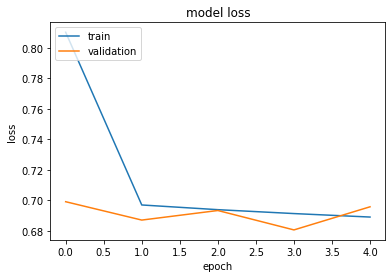

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show() 

In [84]:
rnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.SpecificityAtSensitivity(0.5)])


In [85]:
rnn_model.fit(
    x,y,
    validation_data = (x_val,y_val),
    epochs = 5,batch_size=500)  

Epoch 1/5
54/54 [==============================] - 530s 10s/step - loss: 0.6903 - precision_1: 0.5248 - recall_1: 0.5547 - specificity_at_sensitivity_1: 0.5534 - val_loss: 0.6752 - val_precision_1: 0.3815 - val_recall_1: 0.4423 - val_specificity_at_sensitivity_1: 0.6455
Epoch 2/5
54/54 [==============================] - 525s 10s/step - loss: 0.6829 - precision_1: 0.5786 - recall_1: 0.4471 - specificity_at_sensitivity_1: 0.5732 - val_loss: 0.6865 - val_precision_1: 0.3634 - val_recall_1: 0.5212 - val_specificity_at_sensitivity_1: 0.6506
Epoch 3/5
54/54 [==============================] - 564s 10s/step - loss: 0.6815 - precision_1: 0.5719 - recall_1: 0.4649 - specificity_at_sensitivity_1: 0.5685 - val_loss: 0.6847 - val_precision_1: 0.3701 - val_recall_1: 0.5019 - val_specificity_at_sensitivity_1: 0.6598
Epoch 4/5
54/54 [==============================] - 559s 10s/step - loss: 0.6780 - precision_1: 0.5745 - recall_1: 0.4797 - specificity_at_sensitivity_1: 0.6241 - val_loss: 0.6540 - val_pr

In [87]:
rnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=[tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()])


In [88]:
rnn_model.fit(
    x,y,
    validation_data = (x_val,y_val),
    epochs = 5,batch_size=500)  

Epoch 1/5
54/54 [==============================] - 538s 10s/step - loss: 0.6727 - true_negatives: 8321.0000 - true_positives: 7066.0000 - false_positives: 5014.0000 - false_negatives: 6269.0000 - val_loss: 0.6918 - val_true_negatives: 1712.0000 - val_true_positives: 845.0000 - val_false_positives: 1648.0000 - val_false_negatives: 498.0000
Epoch 2/5
54/54 [==============================] - 565s 10s/step - loss: 0.6713 - true_negatives: 8450.0000 - true_positives: 6799.0000 - false_positives: 4885.0000 - false_negatives: 6536.0000 - val_loss: 0.6698 - val_true_negatives: 1895.0000 - val_true_positives: 762.0000 - val_false_positives: 1465.0000 - val_false_negatives: 581.0000
Epoch 3/5
54/54 [==============================] - 597s 11s/step - loss: 0.6666 - true_negatives: 7000.0000 - true_positives: 8767.0000 - false_positives: 6335.0000 - false_negatives: 4568.0000 - val_loss: 0.6660 - val_true_negatives: 1805.0000 - val_true_positives: 799.0000 - val_false_positives: 1555.0000 - val_fal